In [1]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from tabulate import tabulate


ddi_fp = "drugbank\drugbank.tab"

ddi = pd.read_csv(ddi_fp, sep='\t')

kaggle_fp = "SMILES-Kaggle\chembl_22_clean_1576904_sorted_std_final.smi"

smiles = pd.read_csv(kaggle_fp, sep='\t')

drug_names_fp = "drugs.txt"

drug_names = pd.read_csv(drug_names_fp, sep='\t')


                    



<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\c'
C:\Users\warre\AppData\Local\Temp\ipykernel_16020\3510264872.py:18: SyntaxWarning: invalid escape sequence '\d'
  ddi_fp = "drugbank\drugbank.tab"
C:\Users\warre\AppData\Local\Temp\ipykernel_16020\3510264872.py:22: SyntaxWarning: invalid escape sequence '\c'
  kaggle_fp = "SMILES-Kaggle\chembl_22_clean_1576904_sorted_std_final.smi"


In [2]:
print(tabulate(ddi.describe(), headers='keys', tablefmt='psql'))
ddi

+-------+-------------+
|       |           Y |
|-------+-------------|
| count | 191808      |
| mean  |     49.8303 |
| std   |     19.0136 |
| min   |      1      |
| 25%   |     47      |
| 50%   |     49      |
| 75%   |     67      |
| max   |     86      |
+-------+-------------+


,ID1,ID2,Y,Map,X1,X2
0,DB04571,DB00460,1,#Drug1 may increase the photosensitizing activ...,CC1=CC2=CC3=C(OC(=O)C=C3C)C(C)=C2O1,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...
1,DB00855,DB00460,1,#Drug1 may increase the photosensitizing activ...,NCC(=O)CCC(O)=O,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...
2,DB09536,DB00460,1,#Drug1 may increase the photosensitizing activ...,O=[Ti]=O,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...
3,DB01600,DB00460,1,#Drug1 may increase the photosensitizing activ...,CC(C(O)=O)C1=CC=C(S1)C(=O)C1=CC=CC=C1,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...
4,DB09000,DB00460,1,#Drug1 may increase the photosensitizing activ...,CC(CN(C)C)CN1C2=CC=CC=C2SC2=C1C=C(C=C2)C#N,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...
...,...,...,...,...,...,...
191803,DB00437,DB00492,86,The risk of a hypersensitivity reaction to #Dr...,OC1=NC=NC2=C1C=NN2,CCC(=O)O[C@@H](O[P@](=O)(CCCCC1=CC=CC=C1)CC(=O...
191804,DB00437,DB09477,86,The risk of a hypersensitivity reaction to #Dr...,OC1=NC=NC2=C1C=NN2,[H][C@@](C)(N[C@@]([H])(CCC1=CC=CC=C1)C(O)=O)C...
191805,DB00437,DB00790,86,The risk of a hypersensitivity reaction to #Dr...,OC1=NC=NC2=C1C=NN2,[H][C@]12C[C@H](N(C(=O)[C@H](C)N[C@@H](CCC)C(=...
191806,DB00415,DB00437,86,The risk of a hypersensitivity reaction to #Dr...,[H][C@]12SC(C)(C)[C@@H](N1C(=O)[C@H]2NC(=O)[C@...,OC1=NC=NC2=C1C=NN2


In [3]:
print(tabulate(smiles.describe(), headers='keys', tablefmt='psql'))
smiles

+--------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+
|        | CCO                                                                                                                                                                 | CHEMBL545   |
|--------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------|
| count  | 1576903                                                                                                                                                             | 1576903     |
| unique | 1503671                                                                                                                                                             | 1576903     |
| top    | CSCCC(NC(=O)C(CC(C)C)NC(=O)CNC(=O)

,CCO,CHEMBL545
0,C,CHEMBL17564
1,CO,CHEMBL14688
2,NCCS,CHEMBL602
3,NCCN,CHEMBL816
4,CN,CHEMBL43280
...,...,...
1576898,CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC...,CHEMBL1077161
1576899,CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC...,CHEMBL1077162
1576900,n1(cnc2c1N=C(N)NC2=O)C1OC(COP(O)(=O)OC2C(COP(O...,CHEMBL1077165
1576901,CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC...,CHEMBL1077164


In [4]:
print(tabulate(drug_names.describe(), headers='keys', tablefmt='psql'))
drug_names

+--------+----------------+------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|        | generic_name   |   cns_drug | smiles                                                                                                                                                         |
|--------+----------------+------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| count  | 1691           |       1691 | 1497                                                                                                                                                           |
| unique | 1691           |          2 | 1495                                                                                                                                                   

,generic_name,cns_drug,smiles
0,Abacavir,False,NC1=NC2=C(N=CN2[C@@H]2C[C@H](CO)C=C2)C(NC2CC2)=N1
1,Abarelix,False,NaN
2,Abatacept,False,NaN
3,Abciximab,False,NaN
4,Abiraterone,False,CC(=O)O[C@H]1CC[C@]2(C)C3CC[C@@]4(C)C(CC=C4C4=...
...,...,...,...
1686,Zolmitriptan,True,CN(C)CCC1=CNC2=CC=C(C[C@H]3COC(=O)N3)C=C12
1687,Zolpidem,True,CN(C)C(=O)CC1=C(N=C2C=CC(C)=CN12)C1=CC=C(C)C=C1
1688,Zonisamide,True,NS(=O)(=O)CC1=NOC2=CC=CC=C12
1689,Zopiclone,False,CN1CCN(CC1)C(=O)OC1N(C(=O)C2=NC=CN=C12)C1=NC=C...


Empty DataFrame
Columns: [ID1, ID2, Y, Map, X1, X2]
Index: []
   value  count  row_num  log_count
0     49  60751        1  11.014539
1     47  34360        2  10.444648
2     73  23779        3  10.076558
3     75   9470        4   9.155884
4     60   8397        5   9.035630
..   ...    ...      ...        ...
81    28     11       82   2.397895
82     1     11       83   2.397895
83    52     10       84   2.302585
84    26      7       85   1.945910
85    42      6       86   1.791759

[86 rows x 4 columns]


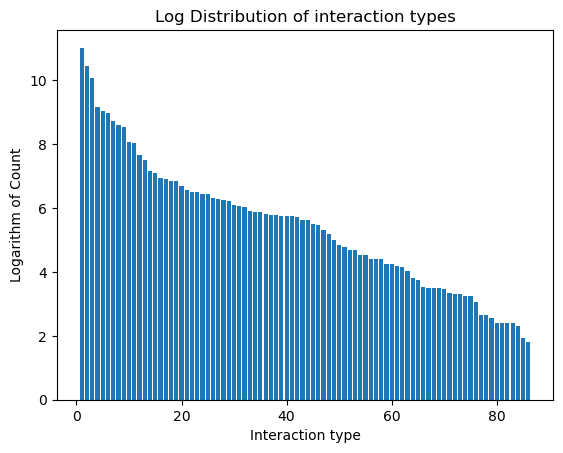

In [5]:
print(ddi[ddi.isnull().any(axis=1)])
ddi["Y"] = ddi["Y"].astype("category")
ddi["Map"] = ddi["Map"].astype("category")
#print(ddi["Y"].describe())

interaction_counts = pd.DataFrame(ddi['Y'].value_counts().rename_axis('value').reset_index(name='count')).sort_values(by='count', ascending=False)

interaction_counts['row_num'] = interaction_counts.index + 1

interaction_counts['log_count'] = np.log(interaction_counts['count'])

print(interaction_counts)

fig, ax = plt.subplots()

ax.bar(interaction_counts["row_num"], interaction_counts["log_count"])

ax.set_ylabel('Logarithm of Count')
ax.set_xlabel("Interaction type")
ax.set_title('Log Distribution of interaction types')



plt.savefig("interaction_types.png")

In [6]:
print(smiles[smiles.isnull().any(axis=1)])

Empty DataFrame
Columns: [CCO, CHEMBL545]
Index: []


In [7]:
print(drug_names[drug_names.isnull().any(axis=1)])

                   generic_name  cns_drug smiles
1                      Abarelix     False    NaN
2                     Abatacept     False    NaN
3                     Abciximab     False    NaN
23                   Adalimumab     False    NaN
31    ado-trastuzumab emtansine     False    NaN
...                         ...       ...    ...
1632                  Tyloxapol     False    NaN
1636             Urofollitropin     False    NaN
1637                  Urokinase     False    NaN
1649                Vasopressin     False    NaN
1651         Velaglucerase alfa     False    NaN

[194 rows x 3 columns]


In [8]:
drug_names = drug_names[drug_names.notnull().any(axis=1)]